         Date  ProductID  SalesAmount
0  2020-01-01        103          468
1  2020-01-02        180          847
2  2020-01-03         93          694
3  2020-01-04         15          653
4  2020-01-05        107          524
Missing values in the dataset:
 Date           0
ProductID      0
SalesAmount    0
dtype: int64


C:\Users\subham\AppData\Local\Temp\ipykernel_7820\635458631.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()


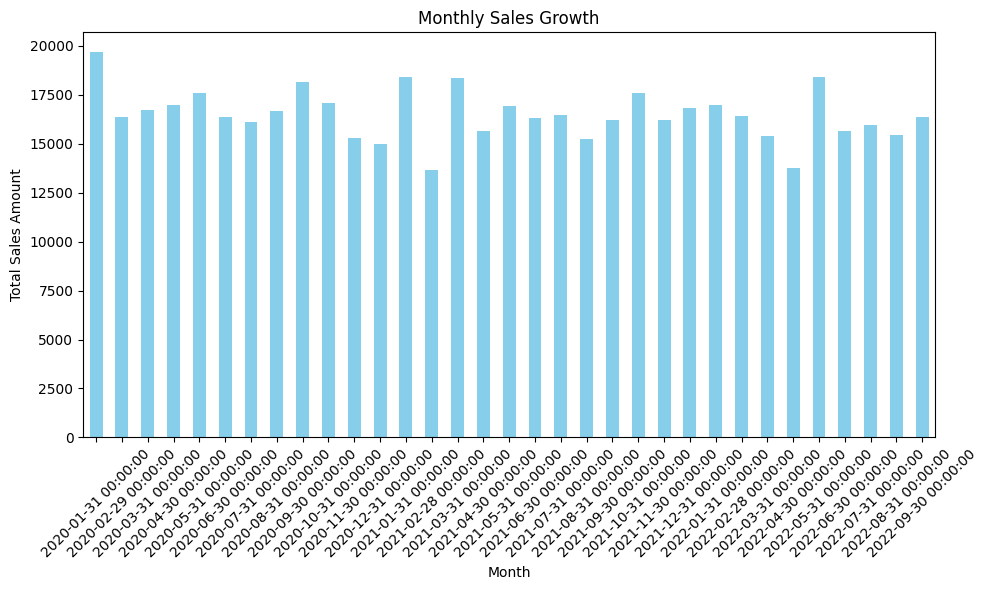

Total Sales Amount: $544135
Average Monthly Sales Amount: $16488.94
Top 5 Products by Sales Amount:
 ProductID
144    7031
99     6656
190    6507
151    6310
47     6206
Name: SalesAmount, dtype: int64


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generating a sample dataset
# Setting a random seed for reproducibility
np.random.seed(42)

# Generating 1000 sales records
date_range = pd.date_range(start='2020-01-01', periods=1000, freq='D')
product_ids = np.random.choice(range(1, 201), size=1000)  # 200 unique products
sales_amounts = np.random.randint(100, 1000, size=1000)  # Random sales amounts between 100 and 1000

# Creating the DataFrame
sales_data = pd.DataFrame({
    'Date': date_range,
    'ProductID': product_ids,
    'SalesAmount': sales_amounts
})

In [2]:
# Step 2: Saving the dataset to a CSV file
sales_data.to_csv('sales_data.csv', index=False)

In [3]:
# Step 3: Data loading and cleaning
# Loading the sales data from the CSV file
df = pd.read_csv('sales_data.csv')

# Displaying the first few rows of the dataset
print(df.head())

# Checking for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

         Date  ProductID  SalesAmount
0  2020-01-01        103          468
1  2020-01-02        180          847
2  2020-01-03         93          694
3  2020-01-04         15          653
4  2020-01-05        107          524
Missing values in the dataset:
 Date           0
ProductID      0
SalesAmount    0
dtype: int64


In [4]:
# Step 4: Data analysis - Monthly sales aggregation
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Setting the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resampling to get monthly sales data
monthly_sales = df.resample('M').sum()

C:\Users\subham\AppData\Local\Temp\ipykernel_7820\752659690.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()


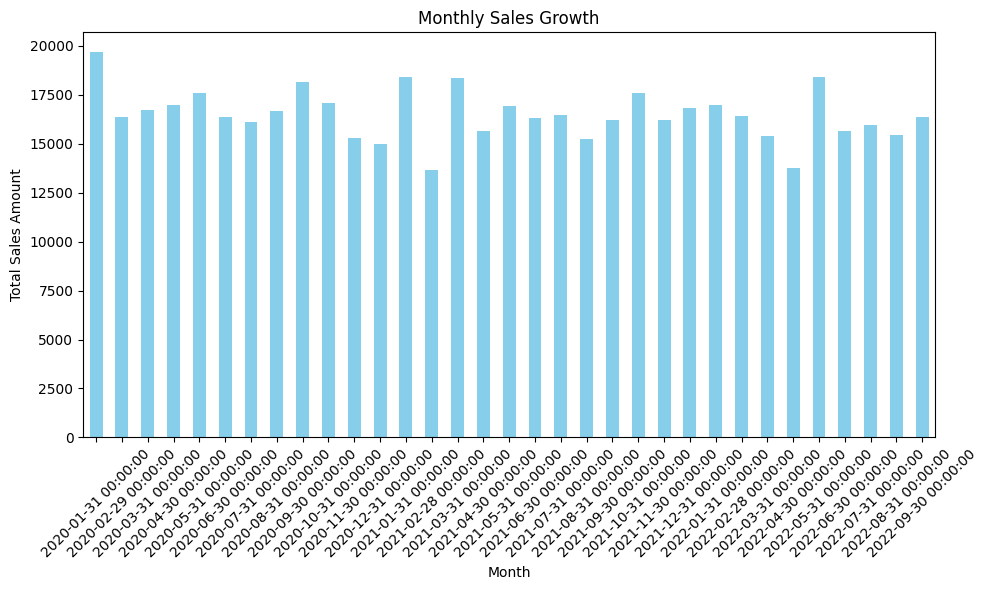

In [5]:
# Step 5: Visualization
# Plotting monthly sales growth
plt.figure(figsize=(10, 6))
monthly_sales['SalesAmount'].plot(kind='bar', color='skyblue')
plt.title("Monthly Sales Growth")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Step 6: Generating insights
# Displaying total sales
total_sales = df['SalesAmount'].sum()
print(f"Total Sales Amount: ${total_sales}")

# Displaying average monthly sales
average_monthly_sales = monthly_sales['SalesAmount'].mean()
print(f"Average Monthly Sales Amount: ${average_monthly_sales:.2f}")

# Identifying top 5 products based on total sales
top_products = df.groupby('ProductID')['SalesAmount'].sum().nlargest(5)
print("Top 5 Products by Sales Amount:\n", top_products)

Total Sales Amount: $544135
Average Monthly Sales Amount: $16488.94
Top 5 Products by Sales Amount:
 ProductID
144    7031
99     6656
190    6507
151    6310
47     6206
Name: SalesAmount, dtype: int64
